# Wakefulness Watcher

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import winsound
import os

In [2]:
newmodel = tf.keras.models.load_model('newmodel')

## FaceDetection and Extracting Eyes

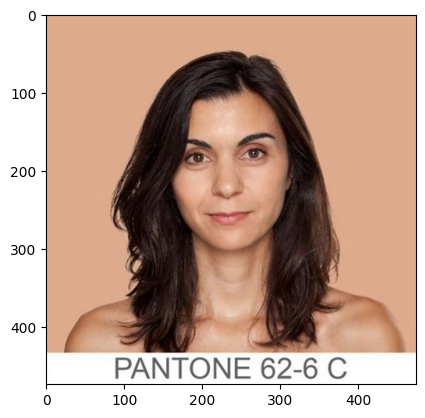

In [5]:
img_size = 224
newimg = cv2.imread('./Eye DataSet/th-3586410498.jpg')
plt.imshow(cv2.cvtColor(newimg ,cv2.COLOR_BGR2RGB))
newimg = cv2.resize(newimg,(img_size,img_size))


In [6]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [7]:
gray = cv2.cvtColor(newimg,cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for (x, y, w, h) in eyes:
    cv2.rectangle(newimg, (x,y), (x+w,y+h), (0,255,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = newimg[y:y+h, x:x+w]
    eyee = eye_cascade.detectMultiScale(roi_gray)
    if len(eyee)==0 : print("No eyes detectede")
    else:
        for (ex, ey, ew, eh) in eyee:
            eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

No eyes detectede


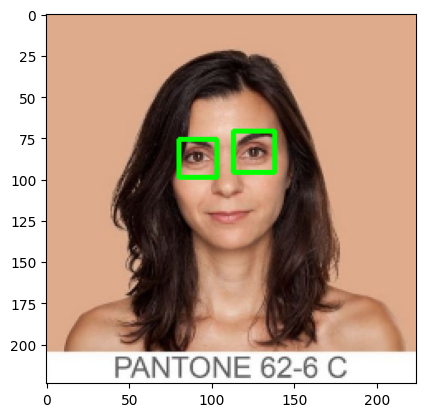

In [8]:
plt.imshow(cv2.cvtColor(newimg,cv2.COLOR_BGR2RGB))

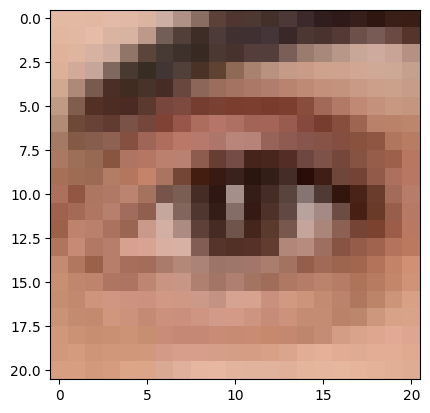

In [9]:
plt.imshow( cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [10]:
img_size = 224
fimg = cv2.resize(newimg, (img_size,img_size))
fimg = np.expand_dims(fimg,axis=0)
fimg = fimg/255.0

In [11]:
fimg.shape

(1, 224, 224, 3)

In [12]:
newmodel.predict(fimg)

1/1 [==============================] - 6s 6s/step


array([[0.95236266]], dtype=float32)

## Detection on Video

In [6]:

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')      #for face detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')                      #for eye detection

Connecting to a webcam

In [4]:
cap = cv2.VideoCapture(0)               

if not cap.isOpened():
    cap = cv2.VideoCapture(1) 
if not cap.isOpened():
    raise IOError("Cannot open webcam")

In [12]:

font = cv2.FONT_HERSHEY_COMPLEX_SMALL
frequency=2000
duration=5000
count = 0
img_size = 224


Openning the live vieo capture to detect face and eyes, then predict whether the eyes are opened or closed

In [19]:
cap = cv2.VideoCapture(0)               

if not cap.isOpened():
    cap = cv2.VideoCapture(1) 
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()                                         # collecting imgs frame by frame
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)                   # gray img input
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)                 # eye detection

    for (x, y, w, h) in eyes:                                       # extracting eye
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        eyee = eye_cascade.detectMultiScale(roi_gray)
        if len(eyee) == 0 : 
            count += 0.01
            print("No eyes detected")
        else:
            for (ex, ey, ew, eh) in eyee:
                eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
    
    final_img = cv2.resize(eyes_roi, (img_size,img_size))           # processing imgs for prediction
    final_img = np.expand_dims(final_img,axis=0)
    final_img = final_img/255.0

    predictions = newmodel.predict(final_img)                       # prediction
    if (predictions>0.23):
        status = 'Eyes Opened'
        cv2.putText(frame,status,(150,150),font,1.5,(0,255,0),2)
        cv2.rectangle(frame, (0,0), (175,75), (255,255,255), -1)
        cv2.putText(frame,'ACTIVE',(20,30),font,0.7,(0,255,0),2)
    else:
        count += 1 
        status = 'Eyes Closed'
        cv2.putText(frame,status,(150,150),font,1.5,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255), 2)
        if count > 10:
            cv2.rectangle(frame, (0,0), (175,75), (255,255,255), -1)
            cv2.putText(frame,'NOT AWAKE!!',(20,30),font,0.5,(255,0,0),2)
            winsound.Beep(frequency, duration)
            count=0
            

    cv2.imshow('Wakefulness Watcher', cv2.resize(frame,(1024,780)))

    if cv2.waitKey(2) & 0xFF == ord('x'):                           # break on pressing 'q' key
        break

cap.release()
cv2.destroyAllWindows()
    

False
1/1 [==============================] - 1s 577ms/step
False
1/1 [==============================] - 0s 153ms/step
False
1/1 [==============================] - 0s 113ms/step
No eyes detected
False
1/1 [==============================] - 0s 113ms/step
False
1/1 [==============================] - 0s 83ms/step
False
1/1 [==============================] - 0s 101ms/step
False
1/1 [==============================] - 0s 93ms/step
False
1/1 [==============================] - 0s 99ms/step
False
1/1 [==============================] - 0s 98ms/step
False
1/1 [==============================] - 0s 75ms/step
False
1/1 [==============================] - 0s 93ms/step
False
1/1 [==============================] - 0s 111ms/step
False
1/1 [==============================] - 0s 101ms/step
No eyes detected
False
1/1 [==============================] - 0s 96ms/step
No eyes detected
No eyes detected
False
1/1 [==============================] - 0s 73ms/step
No eyes detected
False
1/1 [===========================

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


: 

In [10]:
cv2.destroyAllWindows()
cap.release()

In [16]:
newmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_6_bn (BatchNormali  (None, 14, 14, 256)       1024      
 zation)                                                         
                                                                 
 conv_dw_6_relu (ReLU)       (None, 14, 14, 256)       0         
                                                                 
 conv_pw_6 (Conv2D)          (None, 14, 14, 512)       131072    
                                                                 
 conv_pw_6_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_6_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_7 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        